# Bootcamp: Arquiteto(a) de Machine Learning

## Desafio Prático
**Módulo 4: Aplicações de Aprendizado de Máquina Para IoT**

## Objetivos de Ensino
**Exercitar os seguintes conceitos trabalhados no Módulo:**

1. Análise exploratória dos dados (EDA - Exploratory Data Analysis).
2. Preparação dos dados da IoT.
3. Comparação e ajuste de modelos de classificação.

## Enunciado

**Neste desafio serão abordados todos os conceitos apresentados durante o 
módulo Aprendizado de Máquina para IoT e Edge. Para este desafio será 
utilizado o dataset “Fall Detection” disponível no [Kaggle](https://www.kaggle.com/pitasr/falldata/version/1#). 
Para a construção desse dataset foram utilizados um conjunto de sensores 
“vestíveis” afixados em seis posições distintas do corpo de um grupo de 
voluntários. Esses sensores são responsáveis por monitorar diferentes 
atividades do cotidiano desses voluntários. Atividades como levantar, 
caminhar, sentar e correr são identificadas e classificadas por meio desses 
sensores. O artigo “Detecting Falls with Wearable Sensors Using Machine 
Learning Techniques” utiliza esses dados e emprega o aprendizado de 
máquina a fim de identificar os eventos de queda, principalmente em idosos, 
uma vez que esses eventos são vistos como uma das principais causas de 
fraturas e problemas graves em pessoas idosas.**


## Atividades

Os alunos deverão desempenhar as seguintes atividades:
1. Acessar o Google Colaboratory.
2. Realizar o upload do dataset.
3. Construa um código utilizando como base o trabalho prático, os códigos 
apresentados neste módulo e o enunciado das questões presentes 
neste desafio.
4. Para a implementação dos algoritmos utilize as definições abaixo:
* Divisão entre treinamento e teste:
    * *X_train, X_test, y_train, y_test = train_test_split(entrada_normalizada, 
dados['ACTIVITY'], test_size = 0.3,random_state=42)*

* Algoritmo Regressão logística:
    * *lr = LogisticRegression(max_iter=1000,random_state=42)*
* Algoritmo KNN:
    * *clf_KNN = KNeighborsClassifier(n_neighbors=5)*
* Algoritmo Árvore de Decisão:
    * *dtc = DecisionTreeClassifier(random_state=42)*
* Algoritmo Floresta Randômica:
    * *rfc = RandomForestClassifier(n_estimators = 50,random_state=42)*
* Gradiente Boosting:
    * *gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.2,max_features=6, max_depth = 5, random_state = 42)*
* Algoritmo SVM:
    * *clf_svm=SVC(gamma='auto',kernel='rbf')*

**Obs.:** 
1. Utilize a normalização dos dados utilizando o StandardScaler() para todos 
os algoritmos. 
2. Para a divisão dos dados de treinamento e teste dos algoritmos utilize o 
valor de “random_state=42” e a proporção de 70% para treinamento e 
30% para teste.
3. Aplique primeiro a normalização e, depois, aplique a divisão dos dados 
entre treinamento e teste. Para a aplicação de todos os modelos, utilize 
essa sequência de passos.
4. Utilize a variável “ACTIVITY” como saída e as demais como entrada do 
modelo.
5. Para a última questão, considere as chamadas a seguir:
    * *from sklearn.metrics import confusion_matrix
matriz_confusao = confusion_matrix(y_test, previsao)*
    * *print(matriz_confusao)*
    * *seaborn.heatmap(matriz_confusao/np.sum(matriz_confusao), annot=True, fmt='.2%', cmap='Blues'*

## Import de Bibliotecas

In [2]:
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
# Dataset
df=pd.read_csv('./fall_detection.csv')

In [5]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


### 01. No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [26]:
instancia,atributo = df.shape
print(f'O dataset possui {instancia} instancias e {atributo} atributos')

O dataset possui 16382 instancias e 7 atributos


### 02. Quantos tipos diferentes de dados existem no dataset do desafio?

In [21]:
distinct_type = df.dtypes.array.unique()
print(f'O dataset possui {len(distinct_type)} tipos diferentes de dados')

O dataset possui 2 tipos diferentes de dados


### 03.Qual é a média de batimentos cardíacos (HR) para a atividade de corrida (5) nos dados existentes?

In [32]:
media_hr_act5 = df.query('ACTIVITY == 5')['HR'].mean()
print(f'A média de batimentos cardíacos para a atividade de corrida é:{round(media_hr_act5,1)}')

A média de batimentos cardíacos para a atividade de corrida é:192.7


### 04.Quantos tipos distintos de atividades (ACTIVITY) existem?

In [40]:
distinct_act = df.ACTIVITY.unique()
print(f'O dataset possui {len(distinct_act)} atividades distintas.')

O dataset possui 6 atividades distintas.


### 05.Encontre o coeficiente de correlação de Pearson entre todas as variáveis de entrada ['TIME','SL','EEG','BP','HR','CIRCLUATION'] utilizando todos os tipos de atividades (ACTIVITY). Quais são as duas variáveis que possuem o maior coeficiente de correlação de Pearson em valor absoluto (abs(coef))?

In [42]:
# calcula a matriz de correlação de Pearson
corr_matrix = df.corr(method='pearson')

# encontra o par de variáveis com o maior coeficiente de correlação absoluto
max_corr = np.max(np.abs(corr_matrix.values - np.eye(corr_matrix.shape[0])))
i, j = np.where(np.abs(corr_matrix.values - np.eye(corr_matrix.shape[0])) == max_corr)
var1, var2 = corr_matrix.columns[i[0]], corr_matrix.columns[j[0]]

print("As duas variáveis com maior coeficiente de correlação em valor absoluto são", var1, "e", var2)
print("O coeficiente de correlação de Pearson entre elas é", corr_matrix.loc[var1, var2])

As duas variáveis com maior coeficiente de correlação em valor absoluto são SL e CIRCLUATION
O coeficiente de correlação de Pearson entre elas é 0.9780597361779415


### 06.Construa um boxplot para as variáveis BP e HR. Utilizando esse boxplot, o que é possível dizer sobre essas variáveis?

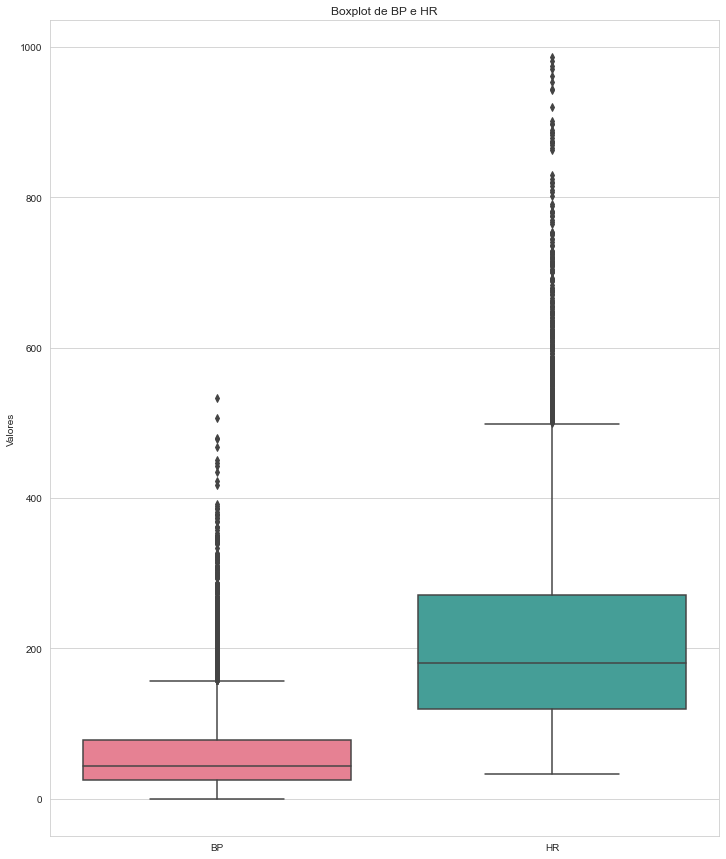

In [54]:
# cria um boxplot para as variáveis BP e HR
sns.set_style("whitegrid")
sns.set_palette("husl", 2)
fig, ax = plt.subplots(figsize=(12, 15))
sns.boxplot(data=df[['BP', 'HR']], ax=ax)
ax.set_xticklabels(['BP', 'HR'])
ax.set_ylabel('Valores')
ax.set_title('Boxplot de BP e HR')

# mostra o gráfico na tela
plt.show()

### 07.Aplique a normalização StandardScaler() para todas as variáveis de entrada (['TIME','SL','EEG','BP','HR','CIRCLUATION']). Após essa normalização, qual é o menor valor existente para a variável SL?

In [81]:
# seleciona as variáveis de entrada
entrada = df[['TIME','SL','EEG','BP','HR','CIRCLUATION']]

# aplica a normalização StandardScaler
scaler = StandardScaler()
entrada_normalizada = scaler.fit_transform(entrada)
entrada_normalizada = pd.DataFrame(entrada_normalizada, columns=entrada.columns)

# encontra o menor valor da variável SL após a normalização
menor_valor_SL = entrada_normalizada.SL.min()

# imprime o menor valor da variável SL após a normalização
print("O menor valor existente para a variável SL após a normalização é:", menor_valor_SL)


O menor valor existente para a variável SL após a normalização é: -0.5900449352473939


### 08.Após a normalização, aplique o train_test_split e divida os dados em 30% para teste e 70% para treino como mostrado no enunciado. Utilize como entrada as colunas ['TIME','SL','EEG','BP','HR','CIRCLUATION'] e como saída a coluna ACTIVITY. Quantas instâncias para o teste existem?

In [82]:
# seleciona as variáveis de entrada e saída
entrada = entrada_normalizada
saida = df['ACTIVITY']

# divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(entrada, saida, test_size=0.3, random_state=42)

# conta o número de instâncias para o teste
num_instancias_teste = X_test.shape[0]

# imprime o número de instâncias para o teste
print("O número de instâncias para o teste é:", num_instancias_teste)

O número de instâncias para o teste é: 4915


### 09.Após a normalização utilizando o StandardScaler() para os dados de entrada, aplique o modelo de classificação utilizando a regressão logística como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [97]:
# cria o modelo de regressão logística
lr = LogisticRegression(max_iter=1000, random_state=42)

# ajusta o modelo aos dados de treino
lr.fit(X_train, y_train)

# faz a predição dos dados de teste
lr_y_pred = lr.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, lr_y_pred)
print("A acurácia nos dados de teste para regressão logística é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para regressão logística é: 0.38


### 10.Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de classificação Árvore de Decisão como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [98]:
# cria o modelo 
dtc = DecisionTreeClassifier(random_state=42)

# ajusta o modelo aos dados de treino
dtc.fit(X_train, y_train)

# faz a predição dos dados de teste
dtc_y_pred = dtc.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, dtc_y_pred)
print("A acurácia nos dados de teste para o modelo de árvore de decisão é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para o modelo de árvore de decisão é: 0.68


### 11.Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de classificação Floresta Randômica como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [99]:
# cria o modelo 
rfc = RandomForestClassifier(n_estimators = 50,random_state=42)

# ajusta o modelo aos dados de treino
rfc.fit(X_train, y_train)

# faz a predição dos dados de teste
rfc_y_pred = rfc.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, rfc_y_pred)
print("A acurácia nos dados de teste para o modelo de Random Forest é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para o modelo de Random Forest é: 0.77


### 12. Agora, utilizando também a normalização StandardScaler() para os dados de entrada, aplique o modelo de Gradiente Boosting como mostrado no enunciado. Utilizando os hiperparâmetros mostrados, qual é a acurácia aproximada obtida após a aplicação desse algoritmo para a classificação das atividades?

In [108]:
# cria o modelo 
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.2, 
max_features=6, max_depth = 5, random_state = 42)


# ajusta o modelo aos dados de treino
gbc.fit(X_train, y_train)

# faz a predição dos dados de teste
gbc_y_pred = gbc.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, gbc_y_pred)
print("A acurácia nos dados de teste para o modelo de Gradiente Boosting é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para o modelo de Gradiente Boosting é: 0.73


### 13.Encontre a matriz de confusão após aplicar os algoritmos KNN, Árvore de Decisão, SVM e a Regressão Logística como mostrado no enunciado. Analisando essa matriz para cada um dos algoritmos, qual desses algoritmos apresenta o maior percentual de identificação correta do evento de queda (ACTIVITY=3) para os dados de teste?

In [101]:
# cria o modelo 
clf_KNN = KNeighborsClassifier(n_neighbors=5)

# ajusta o modelo aos dados de treino
clf_KNN.fit(X_train, y_train)

# faz a predição dos dados de teste
clf_KNN_y_pred = clf_KNN.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, clf_KNN_y_pred)
print("A acurácia nos dados de teste para o modelo de KNN é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para o modelo de KNN é: 0.64


In [102]:
# cria o modelo 
clf_svm = SVC(gamma='auto',kernel='rbf')

# ajusta o modelo aos dados de treino
clf_svm.fit(X_train, y_train)

# faz a predição dos dados de teste
clf_svm_y_pred = clf_svm.predict(X_test)

# calcula a acurácia nos dados de teste
acuracia_teste = accuracy_score(y_test, clf_svm_y_pred)
print("A acurácia nos dados de teste para o modelo de SVM é:", round(acuracia_teste, 2))

A acurácia nos dados de teste para o modelo de SVM é: 0.4


In [117]:
# Regressão Logística
lr_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

# Árvore de Decisão
dtc_confusion_matrix = confusion_matrix(y_test, dtc_y_pred)

# KNN
clf_KNN_confusion_matrix = confusion_matrix(y_test, clf_KNN_y_pred)

# SVM
clf_svm_confusion_matrix = confusion_matrix(y_test, clf_svm_y_pred)

# Porcentagem de identificação correta do evento de queda para cada modelo
lr_fall_acc = lr_confusion_matrix[3, 3] / lr_confusion_matrix[3].sum()
dtc_fall_acc = dtc_confusion_matrix[3, 3] / dtc_confusion_matrix[3].sum()
clf_KNN_fall_acc = clf_KNN_confusion_matrix[3, 3] / clf_KNN_confusion_matrix[3].sum()
clf_svm_fall_acc = clf_svm_confusion_matrix[3, 3] / clf_svm_confusion_matrix[3].sum()

print('='*80)
print("\nPorcentagem de identificação correta do evento de queda:")
print('='*80)
print(f"Regressão Logística: {lr_fall_acc*100:.2f}%")
print('-'*40)
print(f"Árvore de Decisão: {dtc_fall_acc*100:.2f}%")
print('-'*40)
print(f"KNN: {clf_KNN_fall_acc*100:.2f}%")
print('-'*40)
print(f"SVM: {clf_svm_fall_acc*100:.2f}%")



Porcentagem de identificação correta do evento de queda:
Regressão Logística: 42.69%
----------------------------------------
Árvore de Decisão: 62.33%
----------------------------------------
KNN: 64.57%
----------------------------------------
SVM: 33.18%
